# Arctic Lake Bathymetry
#### Transforming Global Surface Water data - ICESat ATL13
##### Original dataset: https://global-surface-water.appspot.com/
#### Melanie Frost
#### 4/18/2023

In [1]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
import geopandas as gpd
import rioxarray as rxr
import matplotlib.pyplot as plt

import earthpy as et
import earthpy.plot as ep
from shapely.geometry import mapping

In [2]:
os.getcwd() 

'/panfs/ccds02/nobackup/people/mfrost2/projects/AKNS'

In [3]:
# File and folder paths


dirpath = r'/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input'

out_fp = r"data/GSW/Output/GSW_mosaic.tif"
out_fp2 = r"data/GSW/Output/GSW_clip.tif"

# Make a search criteria to select the DEM files
search_criteria = "*.tif"

q = os.path.join(dirpath, search_criteria)

print(q)

/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/*.tif


In [4]:
#Get list of files to mosaic
occurance_files = glob.glob(q)
occurance_files

['/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_150W_70Nv1_4_2021.tif',
 '/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_150W_80Nv1_4_2021.tif',
 '/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_160W_70Nv1_4_2021.tif',
 '/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_160W_80Nv1_4_2021.tif',
 '/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_170W_70Nv1_4_2021.tif',
 '/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_170W_80Nv1_4_2021.tif']

In [5]:
#create empty list
src_files_to_mosaic = []

In [6]:
for fp in occurance_files:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)
    
src_files_to_mosaic

[<open DatasetReader name='/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_150W_70Nv1_4_2021.tif' mode='r'>,
 <open DatasetReader name='/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_150W_80Nv1_4_2021.tif' mode='r'>,
 <open DatasetReader name='/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_160W_70Nv1_4_2021.tif' mode='r'>,
 <open DatasetReader name='/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_160W_80Nv1_4_2021.tif' mode='r'>,
 <open DatasetReader name='/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_170W_70Nv1_4_2021.tif' mode='r'>,
 <open DatasetReader name='/explore/nobackup/people/mfrost2/projects/AKNS/data/GSW/Input/occurrence_170W_80Nv1_4_2021.tif' mode='r'>]

In [7]:
#Mosaic files together
mosaic, out_trans = merge(src_files_to_mosaic)

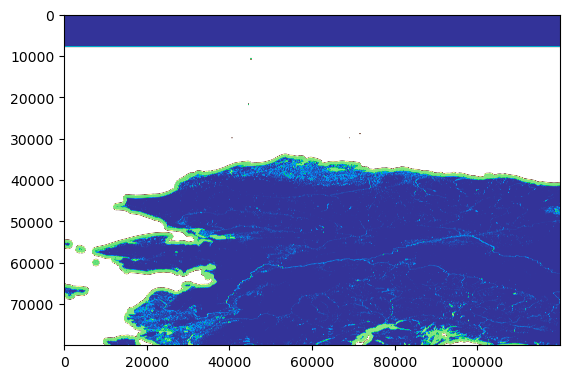

<AxesSubplot: >

In [8]:
#Show the file
show(mosaic, cmap='terrain')

In [9]:
out_meta = src.meta.copy()

In [10]:
 out_meta.update({"driver": "GTiff",
   ....:                  "height": mosaic.shape[1],
   ....:                  "width": mosaic.shape[2],
   ....:                  "transform": out_trans,
   ....:                  "crs": "EPSG:4326"
   ....:                  }
   ....:                 )

In [11]:
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)

In [12]:
gsw = rxr.open_rasterio(out_fp)
#gsw = rasterio.open(out_fp)


In [13]:
# #f, ax = plt.subplots(figsize=(10, 5))
# gsw.plot()
# #ax.set(title="GSW_occurrance")

In [14]:
AKNS_shape_path = os.path.join('data', 'ns_boundary', "nsb_boundary.shp")

AKNS_shape = gpd.read_file(AKNS_shape_path)


# Are the data all in the same crs?
print("AKNS", AKNS_shape.crs)
print("gsw", gsw.rio.crs)

#set CRS of AKNS to WGS84 latitude-longitude projection/authority code "EPSG:4326".
AKNS_shape = AKNS_shape.to_crs("EPSG:4326")
print("AKNS", AKNS_shape.crs)

AKNS epsg:3338
gsw EPSG:4326
AKNS EPSG:4326


[Text(0.5, 1.0, 'AKNS_boundary')]

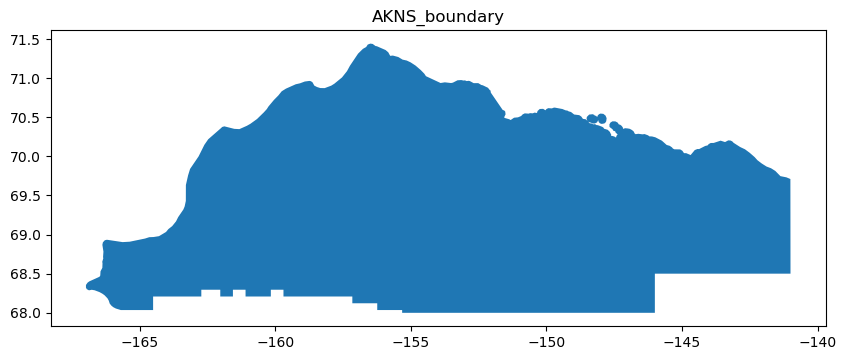

In [15]:
f, ax = plt.subplots(figsize=(10, 5))
AKNS_shape.plot(ax=ax)
ax.set(title="AKNS_boundary")

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))
gsw.plot(ax=ax)

AKNS_shape.plot(ax=ax,
                 alpha=.8)
ax.set(title="Raster Layer with Shapefile Overlayed")

ax.set_axis_off()
plt.show()

In [ ]:
gsw_clipped = gsw.rio.clip(AKNS_shape.geometry.apply(mapping))#,
                                      # This is needed if your GDF is in a diff CRS than the raster data
                                      #AKNS_shape.crs)

# f, ax = plt.subplots(figsize=(10, 4))
# gsw_clipped.plot(ax=ax)
# ax.set(title="GSW layer Cropped to Alaska North Slope")
# ax.set_axis_off()
# plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(10, 4))
gsw_clipped.plot(ax=ax)
ax.set(title="GSW layer Cropped to Alaska North Slope")
ax.set_axis_off()
plt.show()

In [ ]:
with rasterio.open(out_fp2, "w", **out_meta) as dest:
    dest.write(gsw_clipped)